<a href="https://colab.research.google.com/github/lucas96aquino/projeto-mercadodegames/blob/main/Projeto_Case_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto - Case Mercado de Games

O projeto abaixo busca analisar um conjunto de dados sobre o mercado de games, contendo algumas informações como o título do jogo, a empresa que o publicou, suas vendas em milhões ao longo dos anos, a quantidade de vendas por região e etc.

O DataFrame foi retirado do Kaggle e não está completamente atualizado, por isso serão utilizadas as informações apenas de 2013 até 2018 - devido a quantidade de dados nulos e informações incompletas!

In [10]:
# Importar as libs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
# Lendo os dados

Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Verificando o DataFrame

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimensão

Base_Dados.shape

(1034, 9)

In [4]:
# Campos Nulos

Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

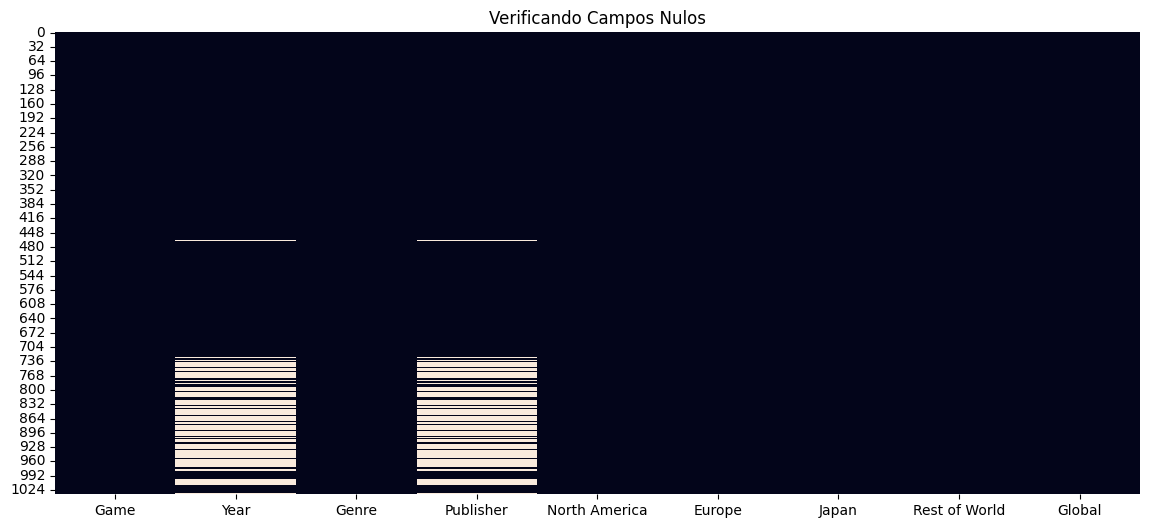

In [5]:
# Nulos Graficos

plt.figure(figsize=(14,6))
plt.title('Verificando Campos Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [6]:
# Retirando Valores Nulos - sem precisar declarar nova variável e já aplicando isso
# diretamente no DataFrame através do inplace.

Base_Dados.dropna(inplace=True)

In [7]:
# Estatísticas

Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [8]:
# Retirando os anos 2019 e 2020

Base_Dados = Base_Dados.loc[(Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

## Distribuição das Vendas Globais

A análise abaixo permite observar a distribuição de dados nos gráficos e a curva aponta uma grande quantidade de outliers.

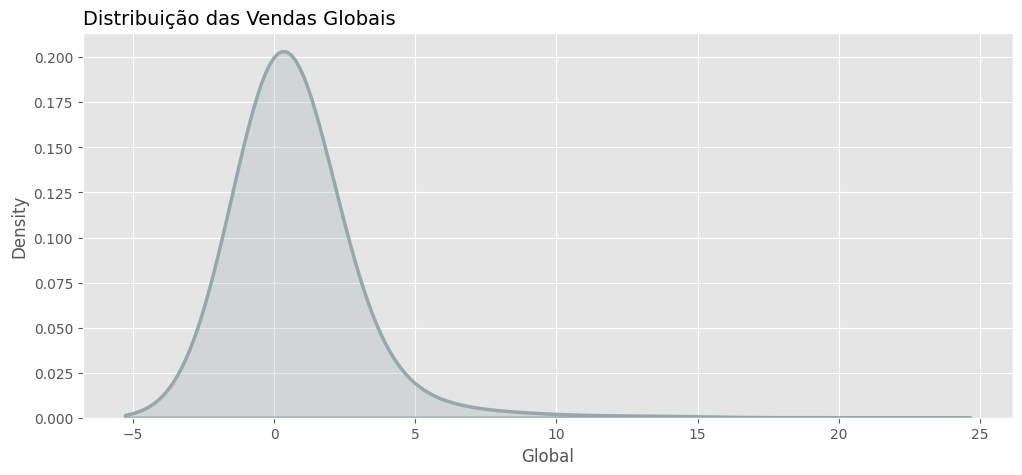

In [12]:
# Curva de distribuição para descobrir outliers

# Tamanho

plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Título
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)
sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [13]:
# Vendas por Anos

Analise = Base_Dados.groupby(by=['Year']).sum().reset_index()

In [14]:
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


## Análise das Vendas ao Longo dos Anos

A coluna Global representa a soma dos continentes do DataFrame. Os outliers são os jogos que mais venderam - e que geralmente são os jogos mais famosos, como o GTA 5.

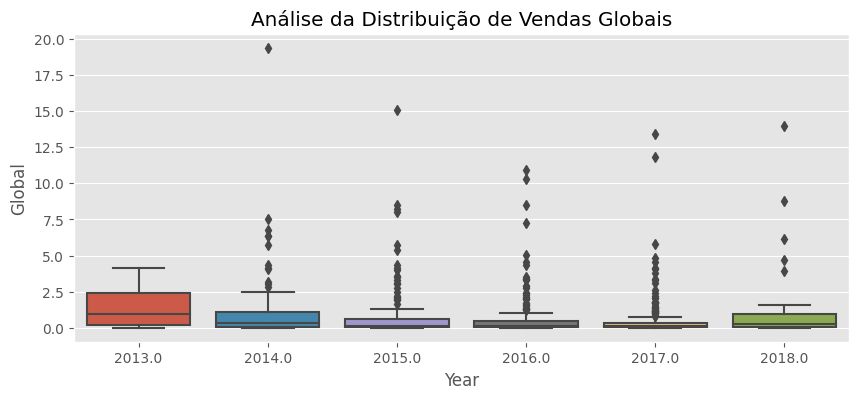

In [15]:
# Tamanho
plt.figure(figsize=(10,4))

# Gráfico
plt.title('Análise da Distribuição de Vendas Globais')
sns.boxplot(data=Base_Dados, x='Year', y='Global');

# Validando informações:

In [16]:
Base_Dados.loc[(Base_Dados['Global'] >= 10)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


## Descobrindo a porcentagem de quanto cada região do DataFrame impactou nas vendas Globais dos jogos ao passar dos anos:

In [17]:
# Os códigos abaixo irão devolver a porcentagem das vendas de cada continente
# de acordo com o ano.

America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europe = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japan = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Rest = [Resto / Total * 100 for Resto, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europe, Japan, Rest

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

# Plotando o gráfico da Análise da Distribuição das Vendas (%) por Continente:

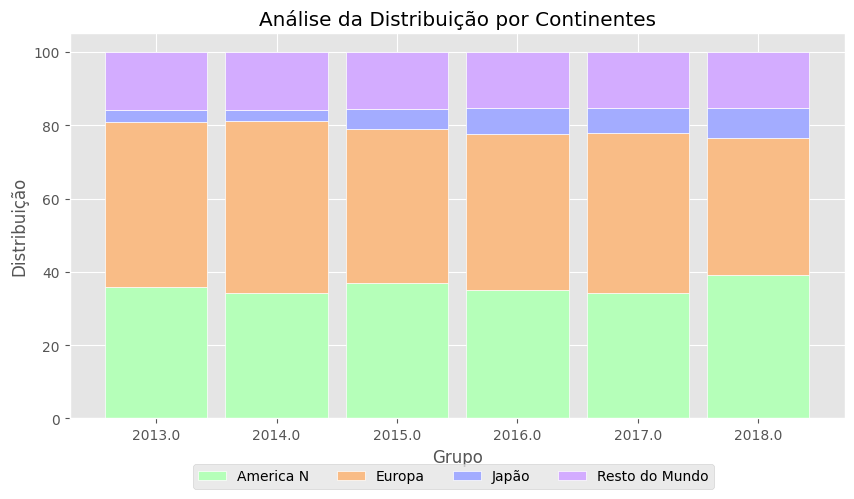

In [18]:
# Tamanho da figura
plt.figure(figsize=(10,5))

# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# Gráfico
plt.title('Análise da Distribuição por Continentes')

# Plot da America
plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar(Grupos, Europe, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')

# Plot do Japão
plt.bar(Grupos, Japan, bottom=[A + B for A, B in zip(America, Europe)], width=Largura_Barra, color='#a3acff', edgecolor='white')

# Plot do Resto do Mundo
plt.bar(Grupos, Rest, bottom=[A + B + C for A, B, C in zip(America, Europe, Japan)], width=Largura_Barra, color='#d3acff', edgecolor='white')

plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição')
plt.legend(['America N', 'Europa', 'Japão', 'Resto do Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

## Praticando Categorização de Dados:

A grande quantidade de dados únicos na coluna 'Publisher' não permite uma plotagem legível de dados pelo excesso de categorias.

Uma alternativa interessante é transformar a coluna 'Publisher' em dados categóricos numéricos através do sklearn.processing.

In [19]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [20]:
# Transformando a coluna publisher em dados numéricos

from sklearn.preprocessing import LabelEncoder

Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform(Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform(Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform(Base_Dados['Game'])

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [21]:
# Declarando uma paleta de cores.
# Cada cor está dentro de uma lista!

Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

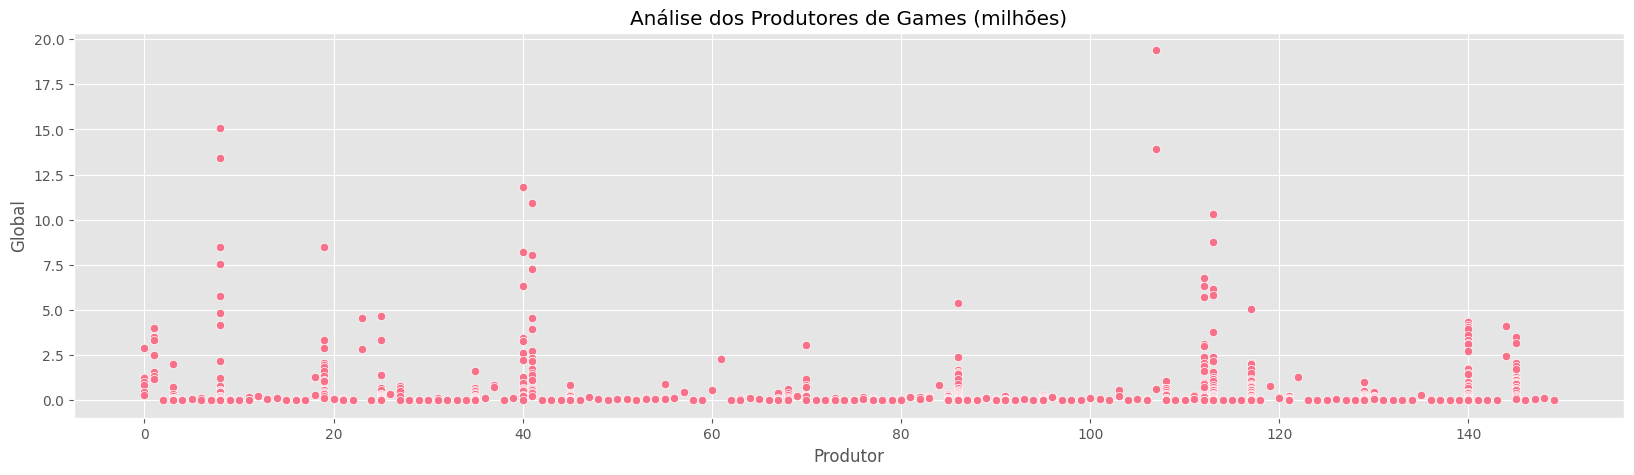

In [22]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Produtores de Games (milhões)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0]);

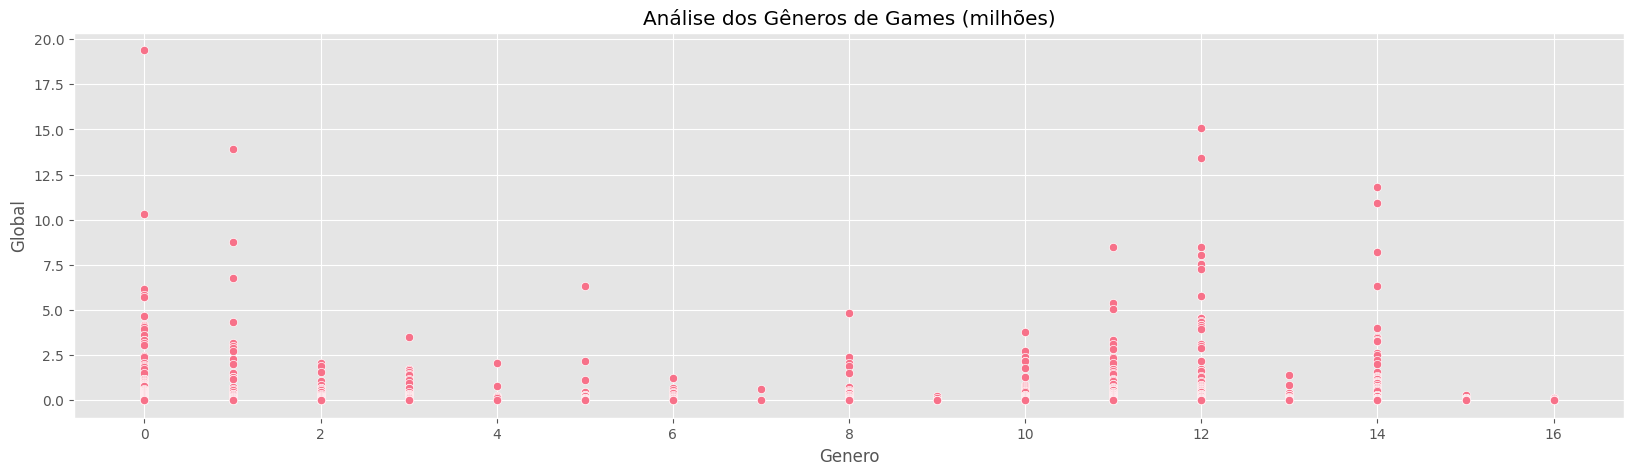

In [23]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Gêneros de Games (milhões)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0]);

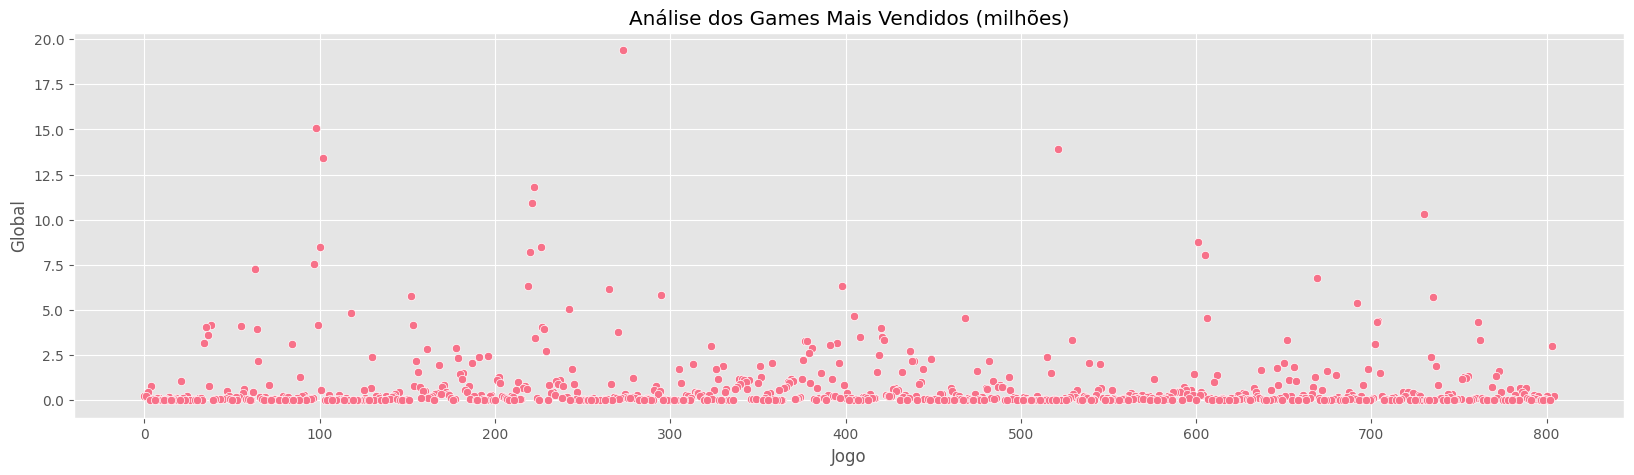

In [24]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Games Mais Vendidos (milhões)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0]);

Text(0.5, 0.03, '\nRelatório elaborado no treinamento de Python.\n')

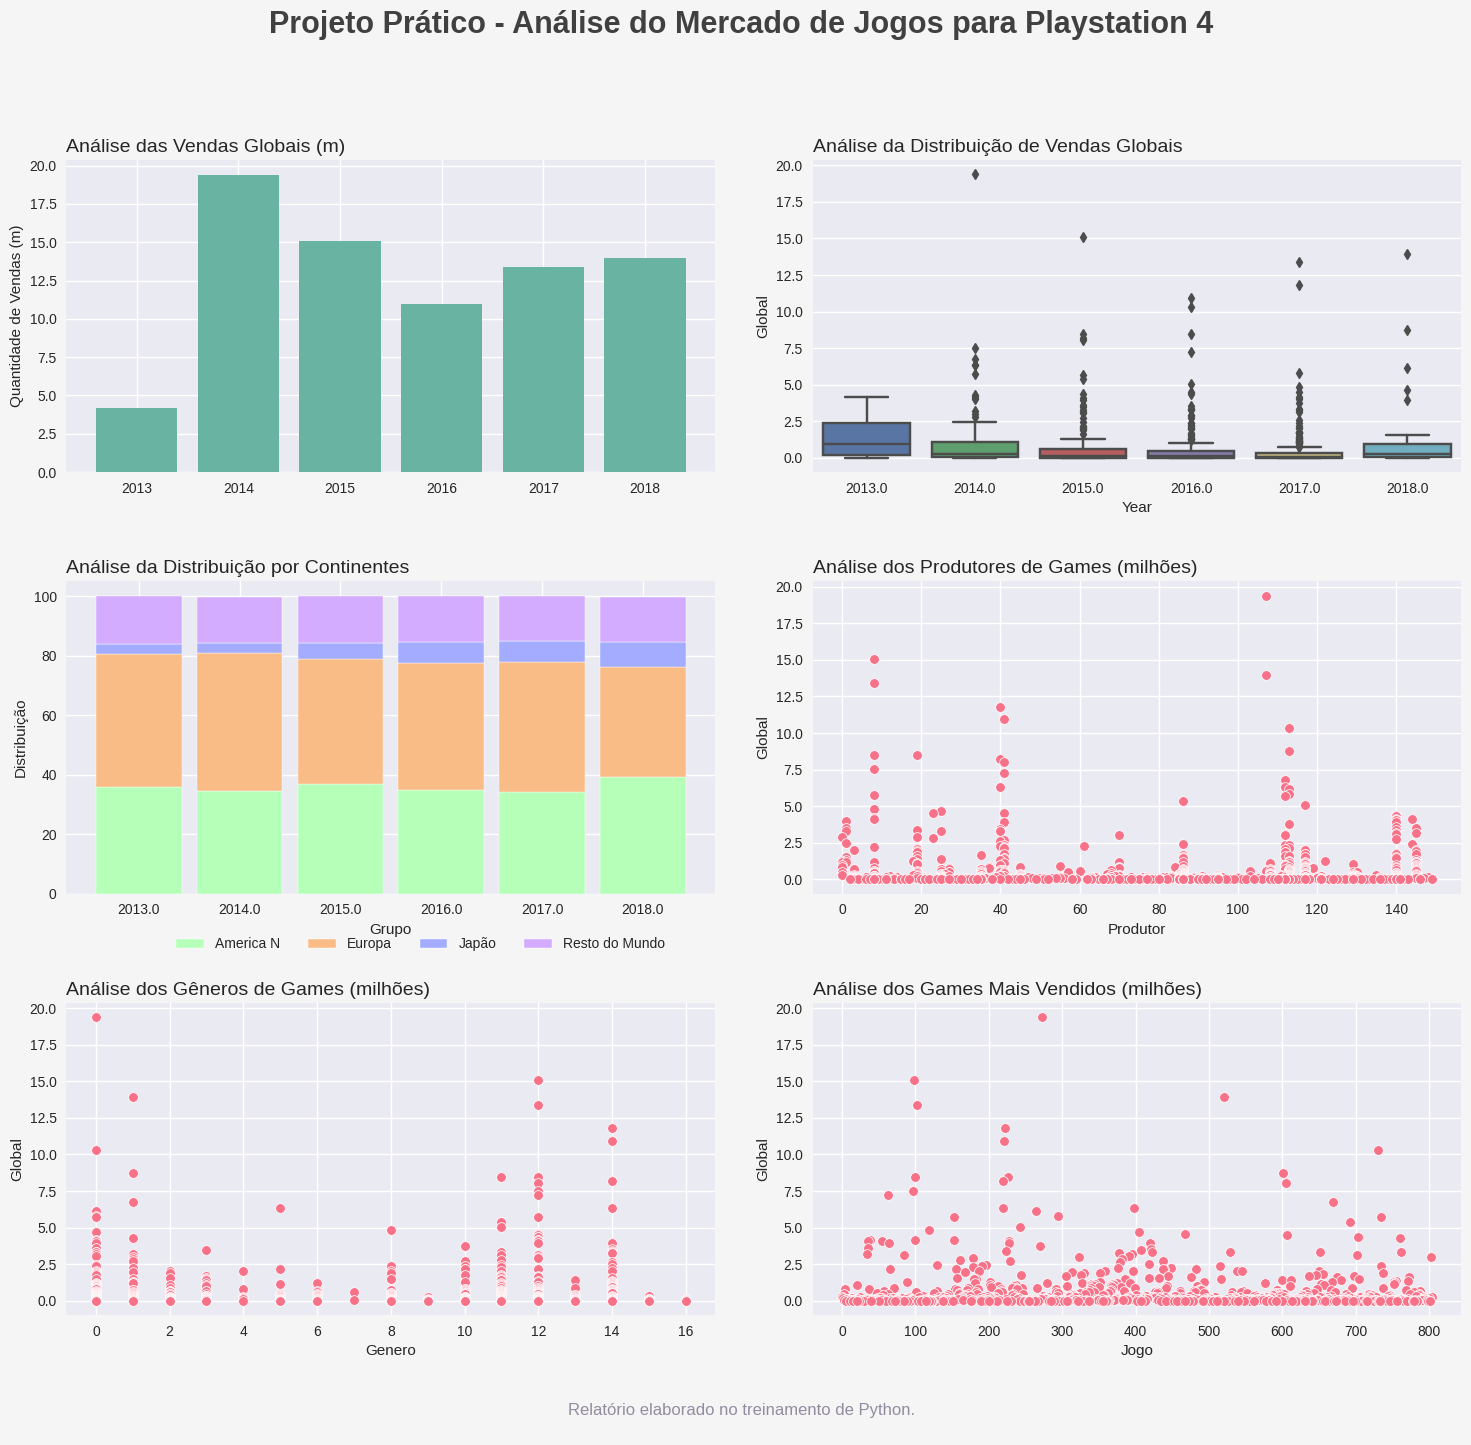

In [48]:
# Relatório ---> Reports

# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15))

# Cor de Fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor(Cor_Fundo)
fig.set_facecolor(Cor_Fundo)

# Parâmetros para o Grid
Linhas = 3
Colunas = 2

# Estilo dos Gráficos
plt.style.use('seaborn')
plt.suptitle('Projeto Prático - Análise do Mercado de Jogos para Playstation 4', fontsize=22, color='#404040', fontweight=600)

# Gráfico 1
plt.subplot(Linhas, Colunas, 1)
plt.title('Análise das Vendas Globais (m)', loc='left', fontsize=14)
plt.bar(Base_Dados['Year'], Base_Dados['Global'], color='#68b3a2')
plt.ylabel('Quantidade de Vendas (m)')

# Gráfico 2
plt.subplot(Linhas, Colunas, 2)
plt.title('Análise da Distribuição de Vendas Globais', loc='left', fontsize=14)
sns.boxplot(data=Base_Dados, x='Year', y='Global');





# Gráfico 3
plt.subplot(Linhas, Colunas, 3)
# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# Gráfico
plt.title('Análise da Distribuição por Continentes', loc='left', fontsize=14)
# Plot da America
plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white')
# Plot da Europa
plt.bar(Grupos, Europe, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')
# Plot do Japão
plt.bar(Grupos, Japan, bottom=[A + B for A, B in zip(America, Europe)], width=Largura_Barra, color='#a3acff', edgecolor='white')
# Plot do Resto do Mundo
plt.bar(Grupos, Rest, bottom=[A + B + C for A, B, C in zip(America, Europe, Japan)], width=Largura_Barra, color='#d3acff', edgecolor='white')
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição')
plt.legend(['America N', 'Europa', 'Japão', 'Resto do Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);





# Gráfico 4
plt.subplot(Linhas, Colunas, 4)
plt.title('Análise dos Produtores de Games (milhões)', loc='left', fontsize=14)
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0]);

# Gráfico 5
plt.subplot(Linhas, Colunas, 5)
plt.title('Análise dos Gêneros de Games (milhões)', loc='left', fontsize=14)
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0]);

# Gráfico 6
plt.subplot(Linhas, Colunas, 6)
plt.title('Análise dos Games Mais Vendidos (milhões)', loc='left', fontsize=14)
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0]);

# Ajustando o Layout - colocando espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.35, wspace=0.15)

# Rodapé
Rodape = '''
Relatório elaborado no treinamento de Python.
'''

fig.text(0.5, 0.03, Rodape, ha='center', va='bottom', size=12, color='#938ca1')